<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Nestle_Share_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 4: **Nestle Share price prediction**

Algorithm Used: **Multiple regression**

Steps:


*   Loading the dataset using pandas library
*   preprocessing the dataset using Excel.


*   Exploratory Data Analysis
*   Model building using Multiple regression Algorithm and Support vector 
    regression


*  Model testing using MSE,MAE,R2-SCORE,RMSE







In [1]:
#Loading the dataset using pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/nestle.csv")
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


**Data Preprocessing**

In [2]:
df.dtypes

Date                          object
Open Price                   float64
High Price                   float64
Low Price                    float64
Close Price                  float64
WAP                          float64
No.of Shares                   int64
No. of Trades                  int64
Total Turnover (Rs.)         float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread High-Low              float64
Spread Close-Open            float64
dtype: object

In [3]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

Date                         0.000000
Open Price                   0.000000
High Price                   0.000000
Low Price                    0.000000
Close Price                  0.000000
WAP                          0.000000
No.of Shares                 0.000000
No. of Trades                0.000000
Total Turnover (Rs.)         0.000000
Deliverable Quantity         0.078339
% Deli. Qty to Traded Qty    0.078339
Spread High-Low              0.000000
Spread Close-Open            0.000000
dtype: float64

Since the missing value percentages are very less we can use **dropna** function to remove them

In [4]:
#removing missing values
df.dropna(inplace=True)

In [5]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

Date                         0.0
Open Price                   0.0
High Price                   0.0
Low Price                    0.0
Close Price                  0.0
WAP                          0.0
No.of Shares                 0.0
No. of Trades                0.0
Total Turnover (Rs.)         0.0
Deliverable Quantity         0.0
% Deli. Qty to Traded Qty    0.0
Spread High-Low              0.0
Spread Close-Open            0.0
dtype: float64

In [6]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2.551000e+03,2551.000000,2551.000000,2551.000000,2551.000000
mean,9335.655684,9427.351039,9224.573403,9322.587279,9325.203667,5522.303018,1004.203842,4.762314e+07,3264.052528,49.024461,202.777636,-13.068405
std,4939.519226,4985.801142,4878.036837,4931.789757,4928.474440,10420.816889,1137.987345,8.506207e+07,8652.860793,19.119739,174.995455,157.898334
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5390.500000,5444.625000,5322.575000,5381.975000,5384.453479,1570.000000,442.000000,1.171583e+07,653.500000,35.575000,88.825000,-71.600000
50%,6804.000000,6866.000000,6746.000000,6809.100000,6811.956570,2618.000000,731.000000,2.219470e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13254.975000,13655.475000,12815.000000,13443.100000,13328.448479,4977.000000,1200.500000,4.940228e+07,2225.500000,59.130000,263.050000,48.275000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


In [7]:
#Taking average of High Price and High Price
df['Average_price']=(df['High Price']+df['Low Price'])/2

In [8]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Average_price
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,18172.925
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,18216.075
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,18281.800
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,18489.500
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,18398.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4118.000
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,4103.450
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,4103.200
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,4085.100


In [9]:
#dropping 'High Price' and 'Low Price'
df.drop(['High Price','Low Price'],axis=1,inplace=True)
df

,Date,Open Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Average_price
0,21-April-2022,18150.00,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,18172.925
1,20-April-2022,18100.10,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,18216.075
2,19-April-2022,18470.05,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,18281.800
3,18-April-2022,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,18489.500
4,13-April-2022,18371.20,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,18398.775
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4118.000
2549,5-January-2012,4118.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,4103.450
2550,4-January-2012,4100.00,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,4103.200
2551,3-January-2012,4061.00,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,4085.100


In [10]:
#Splitting day,month and year into separate columns
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.weekday
df

,Date,Open Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Average_price,year,month,day
0,21-April-2022,18150.00,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,18172.925,2022,4,3
1,20-April-2022,18100.10,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,18216.075,2022,4,2
2,19-April-2022,18470.05,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,18281.800,2022,4,1
3,18-April-2022,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,18489.500,2022,4,0
4,13-April-2022,18371.20,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,18398.775,2022,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4118.000,2012,1,4
2549,5-January-2012,4118.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,4103.450,2012,1,3
2550,4-January-2012,4100.00,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,4103.200,2012,1,2
2551,3-January-2012,4061.00,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,4085.100,2012,1,1


In [11]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
df['day'] = df['day'].map(days)

In [12]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['month']=df['month'].map(months)

In [13]:
df

,Date,Open Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Average_price,year,month,day
0,21-April-2022,18150.00,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,18172.925,2022,April,Thursday
1,20-April-2022,18100.10,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,18216.075,2022,April,Wednesday
2,19-April-2022,18470.05,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,18281.800,2022,April,Tuesday
3,18-April-2022,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,18489.500,2022,April,Monday
4,13-April-2022,18371.20,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,18398.775,2022,April,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4118.000,2012,January,Friday
2549,5-January-2012,4118.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15,4103.450,2012,January,Thursday
2550,4-January-2012,4100.00,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60,4103.200,2012,January,Wednesday
2551,3-January-2012,4061.00,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35,4085.100,2012,January,Tuesday


**Exploratory Data Analysis**

<Axes: xlabel='year', ylabel='Close Price'>

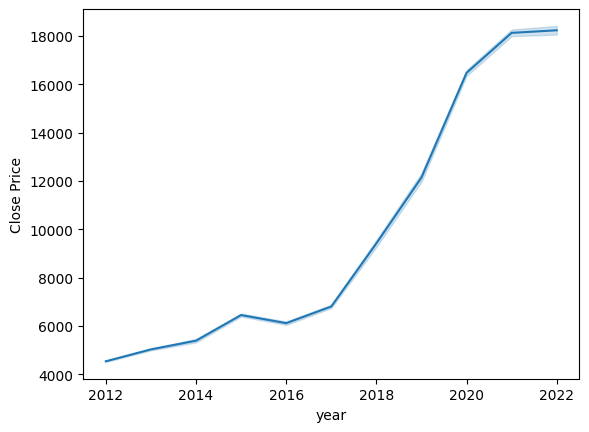

In [15]:
sns.lineplot(x='year',y='Close Price',data=df)

<Axes: xlabel='year', ylabel='No.of Shares'>

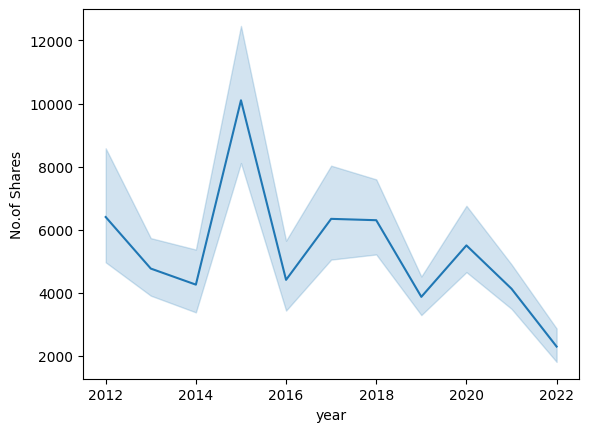

In [16]:
sns.lineplot(x='year',y='No.of Shares',data=df)

In [19]:
a=df.sort_values(by='Close Price',ascending=False).head(20)[['Close Price','day']].reset_index()
index_remove=[3,5,6,7,8,9,11,12,13,14,15,16,17,18,19]
for i in index_remove:
  a=a.drop(i)
a

,index,Close Price,day
0,151,20439.45,Thursday
1,150,20434.60,Monday
2,153,20373.25,Tuesday
4,155,20260.15,Friday
10,148,20118.20,Wednesday


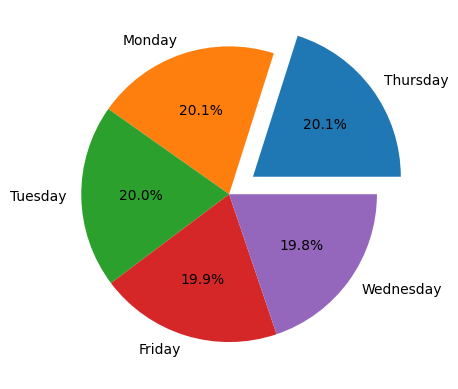

In [21]:
y=a['Close Price']
days=['Thursday','Monday','Tuesday','Friday','Wednesday']
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(y,labels=days,explode = myexplode,autopct='%1.1f%%')
plt.show()

In [22]:
b= df.groupby('month')['Close Price'].sum().reset_index()
b.head(10)

,month,Close Price
0,April,1887813.30
1,August,1928993.35
2,December,2122413.60
3,February,2007800.70
4,January,2216860.05
5,July,2006450.90
6,June,1898832.45
7,March,2063765.20
8,May,1834994.90
9,November,1954500.65


<Axes: xlabel='month', ylabel='Close Price'>

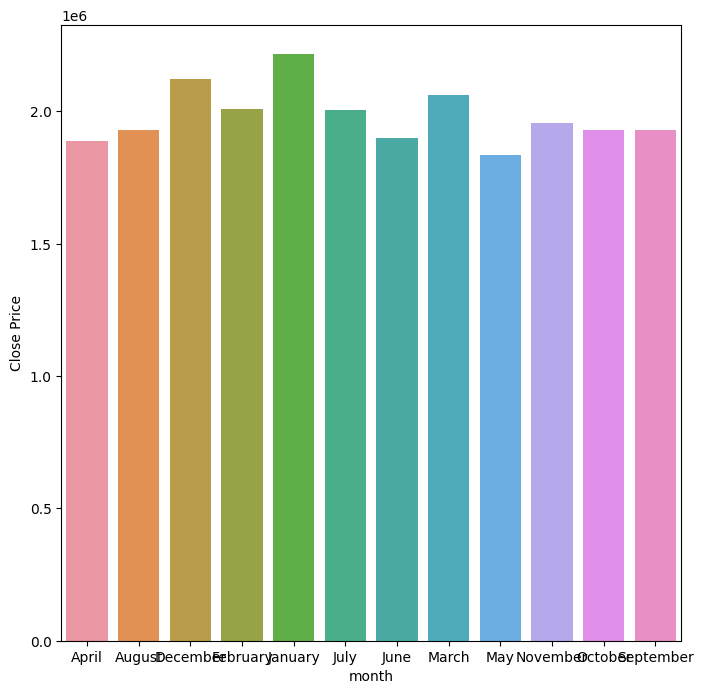

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='month',y='Close Price',data=b,ax=ax)

Observations:

There has been a huge increase in the close price from the year **2017 to 2022**

The number of shares was in a peak in the year **2015**

The close price was maximum on **Thursday**

The close price was maximum in the month of **January**

<ipython-input-24-ae8a5c06d509>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,ax=ax)


<Axes: >

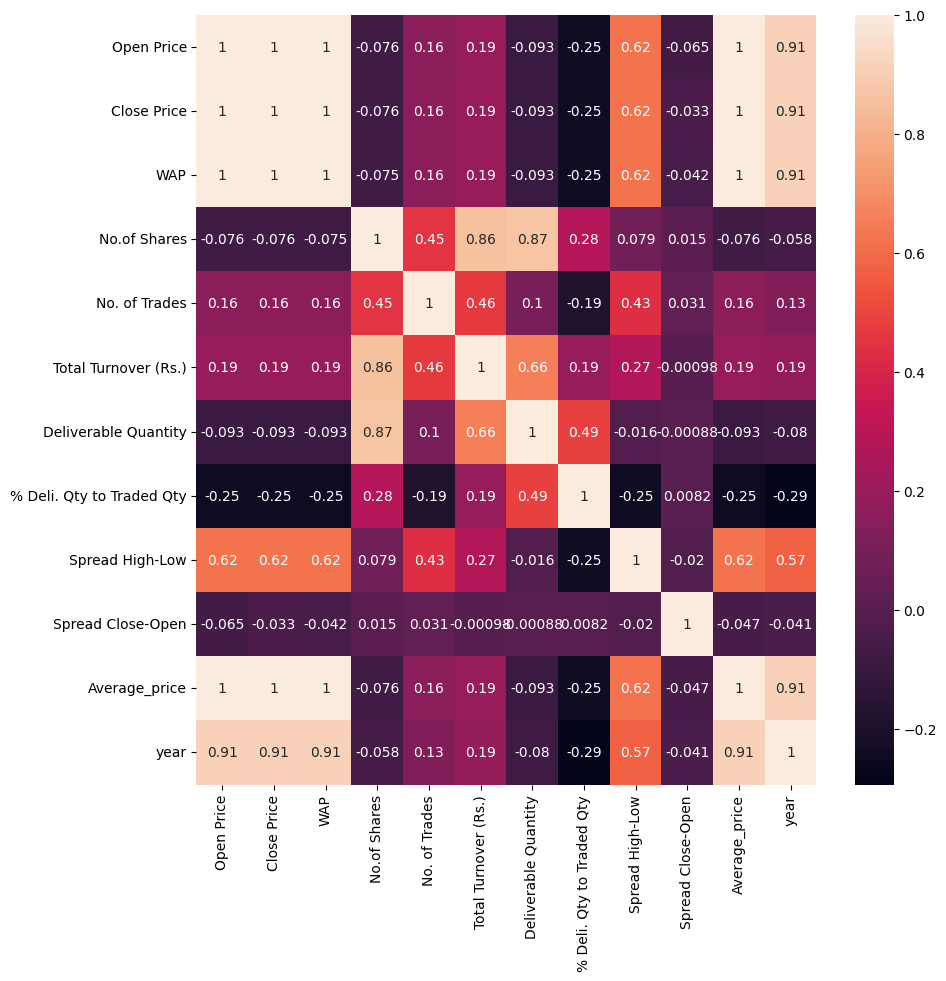

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

Here we can see WAP,open price and close price are highly correlated hence **WAP** can be removed

In [25]:
df.drop(['WAP'],axis=1,inplace=True)
df

,Date,Open Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Average_price,year,month,day
0,21-April-2022,18150.00,18205.80,4590,1770,83217542.0,950.0,20.70,800.05,55.80,18172.925,2022,April,Thursday
1,20-April-2022,18100.10,18313.70,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,18216.075,2022,April,Wednesday
2,19-April-2022,18470.05,17943.15,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,18281.800,2022,April,Tuesday
3,18-April-2022,18294.50,18549.85,1496,586,27692792.0,557.0,37.23,390.00,255.35,18489.500,2022,April,Monday
4,13-April-2022,18371.20,18343.90,1150,550,21147313.0,573.0,49.83,301.05,-27.30,18398.775,2022,April,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4143.25,3107,444,12830314.0,2069.0,66.59,84.00,29.25,4118.000,2012,January,Friday
2549,5-January-2012,4118.00,4101.85,1018,270,4180772.0,357.0,35.07,46.90,-16.15,4103.450,2012,January,Thursday
2550,4-January-2012,4100.00,4120.60,2857,247,11728288.0,2312.0,80.92,43.60,20.60,4103.200,2012,January,Wednesday
2551,3-January-2012,4061.00,4095.35,5003,886,20469646.0,2817.0,56.31,50.00,34.35,4085.100,2012,January,Tuesday


<Axes: xlabel='Open Price', ylabel='Close Price'>

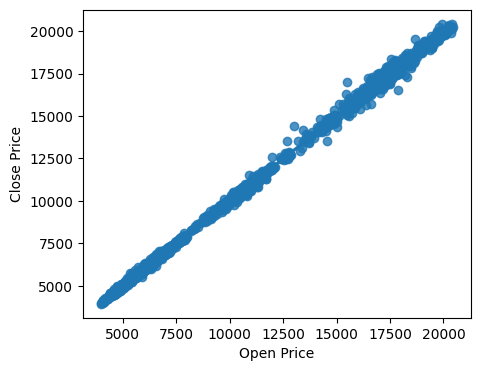

In [26]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Open Price',y='Close Price',data=df,ax=ax)

<Axes: xlabel='No.of Shares', ylabel='Close Price'>

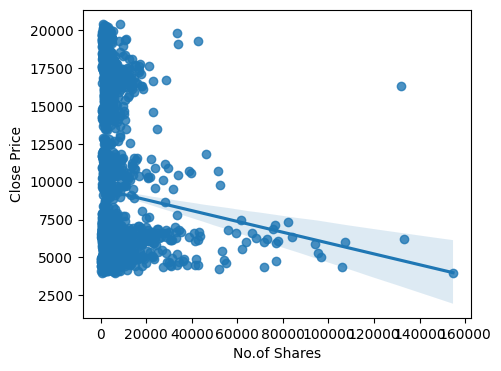

In [27]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='No.of Shares',y='Close Price',data=df,ax=ax)

<Axes: xlabel='Average_price', ylabel='Close Price'>

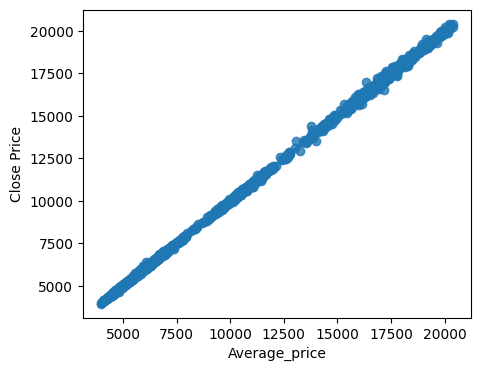

In [28]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Average_price',y='Close Price',data=df,ax=ax)

<Axes: xlabel='No. of Trades', ylabel='Close Price'>

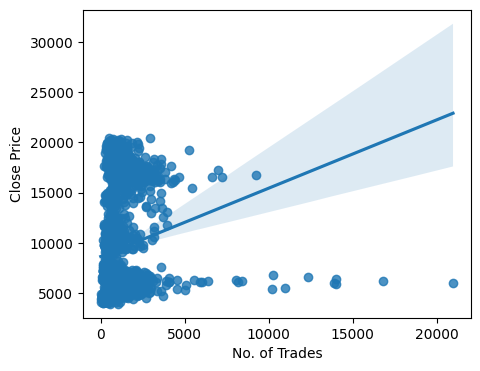

In [29]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='No. of Trades',y='Close Price',data=df,ax=ax)

<Axes: xlabel='Total Turnover (Rs.)', ylabel='Close Price'>

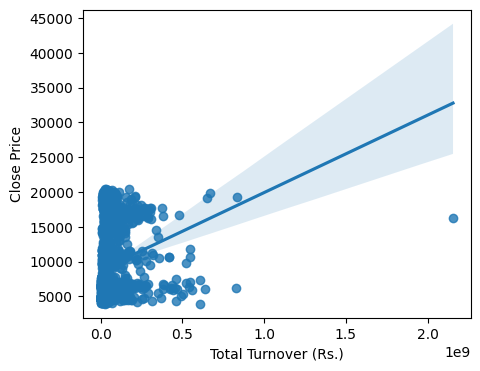

In [30]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Total Turnover (Rs.)',y='Close Price',data=df,ax=ax)

<Axes: xlabel='Deliverable Quantity', ylabel='Close Price'>

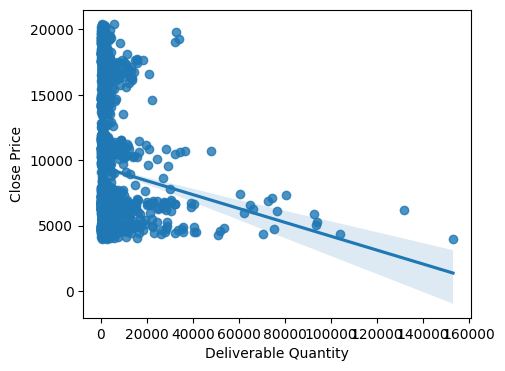

In [31]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Deliverable Quantity',y='Close Price',data=df,ax=ax)

<Axes: xlabel='% Deli. Qty to Traded Qty', ylabel='Close Price'>

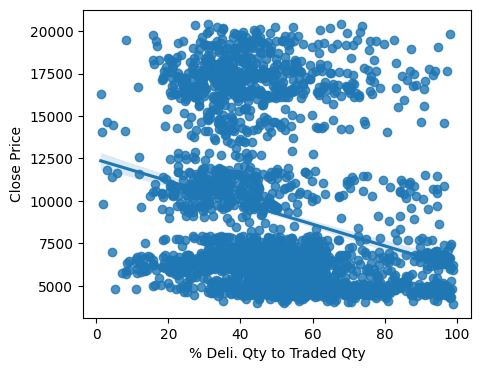

In [32]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='% Deli. Qty to Traded Qty',y='Close Price',data=df,ax=ax)

<Axes: xlabel='Spread High-Low', ylabel='Close Price'>

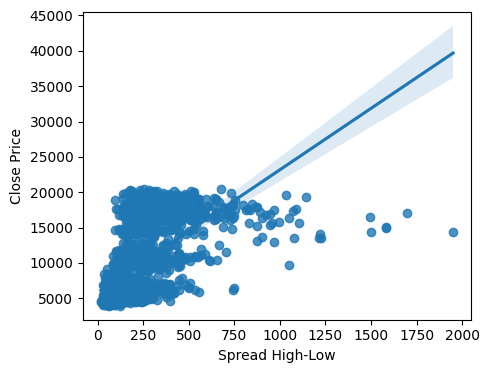

In [33]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Spread High-Low',y='Close Price',data=df,ax=ax)

<Axes: xlabel='Spread Close-Open', ylabel='Close Price'>

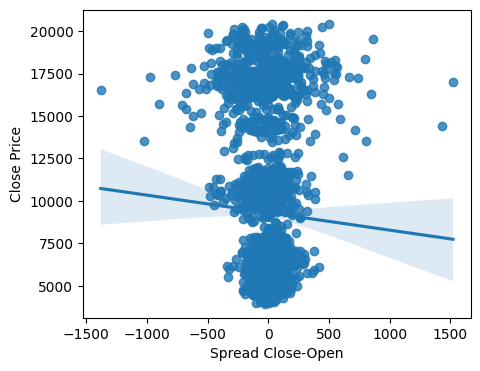

In [34]:
fig, ax = plt.subplots(figsize=(5,4))
sns.regplot(x='Spread Close-Open',y='Close Price',data=df,ax=ax)

dropping 'Spread Close-Open' and '% Deli. Qty to Traded Qty' since they dont show any regression pattern

In [35]:
df.drop(['% Deli. Qty to Traded Qty','Spread Close-Open'],axis=1,inplace=True)

In [36]:
df.drop(['Date','year','month','day'],axis=1,inplace=True)
df

,Open Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,Spread High-Low,Average_price
0,18150.00,18205.80,4590,1770,83217542.0,950.0,800.05,18172.925
1,18100.10,18313.70,6069,1321,111035748.0,4677.0,397.85,18216.075
2,18470.05,17943.15,2904,716,53303191.0,1619.0,872.40,18281.800
3,18294.50,18549.85,1496,586,27692792.0,557.0,390.00,18489.500
4,18371.20,18343.90,1150,550,21147313.0,573.0,301.05,18398.775
...,...,...,...,...,...,...,...,...
2548,4114.00,4143.25,3107,444,12830314.0,2069.0,84.00,4118.000
2549,4118.00,4101.85,1018,270,4180772.0,357.0,46.90,4103.450
2550,4100.00,4120.60,2857,247,11728288.0,2312.0,43.60,4103.200
2551,4061.00,4095.35,5003,886,20469646.0,2817.0,50.00,4085.100


In [42]:
X=df.drop(['Close Price'],axis=1)
y=df['Close Price']

In [44]:
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

In [46]:
#Performing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.3,random_state=0)

In [48]:
#model building using Multiple regression
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
y_pred

array([15356.19065585, 15226.94369959, 12059.9667935 ,  6227.92914148,
        4945.66700909, 15667.60586718,  4518.06263636, 19434.91310272,
       10174.67236213, 11507.0729471 ,  4876.62290106, 16283.06947513,
       18125.29452595,  7714.3639481 ,  6324.31033826,  6341.50642477,
        6690.69262067,  6917.781967  ,  5968.83688138,  5548.57665363,
        6459.07609311, 14160.80145482,  6299.58753891, 10939.19641655,
        6572.20620213,  4734.6248994 ,  7437.48771706, 14395.98734434,
        5985.04142388,  7970.17143415,  7226.07180169,  5880.74399582,
        4947.13669568,  6065.57748303,  6542.88037029,  4831.34654086,
       17599.91272569, 10447.83925891, 11710.64789852, 11502.10352642,
        4922.21770055,  6298.37390817,  4681.94243316,  9371.5220794 ,
       11466.89400697,  4741.59112199, 17690.78192949, 16255.56624692,
        4596.55692193, 14171.04388066,  9740.0300046 ,  4934.80636008,
       18931.05629467,  6483.76968458,  6994.99293607,  5952.51784237,
      

In [49]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result

,Actual Values,Predicted Values
559,15280.20,15356.190656
391,15203.25,15226.943700
667,11981.50,12059.966794
1266,6209.05,6227.929141
2295,4941.90,4945.667009
...,...,...
1162,6729.55,6710.094331
816,11191.10,11356.329435
1334,6281.05,6239.335097
1509,5053.85,5056.823567


In [50]:
#model validation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 38.2602034635382
mean squared error: 3543.755027378873
root mean squared error: 59.52944672495179
r2-score: 0.9998468836719663


In [54]:
#prediction using mlr
import warnings
warnings.filterwarnings('ignore')
y_new=mlr.predict(ss.transform([[15725,6001,592,73894467,950,800,18172]]))
y_new

array([19445.27772616])